In [ ]:
# Testing the Sentiment analysis script I made from CA2_S1

In [1]:
# Sentiment analysis
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string
#from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Authentication
consumerKey = 'EdteVNJhNXfu6ziho6DY0OPMu'
consumerSecret = 'xZCwqQPFejSL31rQ7S5fZYbLCcmzd47WUCfl2u48l8uE0DbyHz'
accessToken = '2864240182-VUa8rIR3gPXARqbnXIgd3RofCdyzp9d1zQjaY6j'
accessTokenSecret = 'hvzDpkaltkzXjpMqZnvDLdPQMej0sxavQpuhKdzbfTPtV'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#api.search_tweets()
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\acooke\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
#Sentiment Analysis
# source https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

# 
def percentage(part,whole):
 return 100 * float(part)/float(whole)
#keyword = input("Cow's milk")
keyword = "Wind Farms"
#noOfTweet = int(input ("10"))
#noOfTweet = int(input ("100"))
noOfTweet = 1000
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

counter = 0

for tweet in tweets:
 counter = counter + 1
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 if neg > pos:
     negative_list.append(tweet.text)
     negative += 1
 elif pos > neg:
         positive_list.append(tweet.text)
         positive += 1
 
 elif pos == neg:
         neutral_list.append(tweet.text)
         neutral += 1
    
print("neutral = " + str(neutral))
print("positive = " + str(positive))
print("negative = " + str(negative))

neutral = 327
positive = 413
negative = 260


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  413
negative number:  260
neutral number:  327


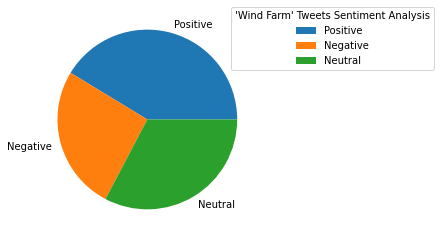

In [7]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([len(positive_list), len(negative_list), len(neutral_list)])
mylabels = ["Positive", "Negative", "Neutral"]

plt.pie(y, labels = mylabels)
plt.legend(title = "'Wind Farm' Tweets Sentiment Analysis", loc="upper left", bbox_to_anchor=(0.85,1.025), )
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.show() 